In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns

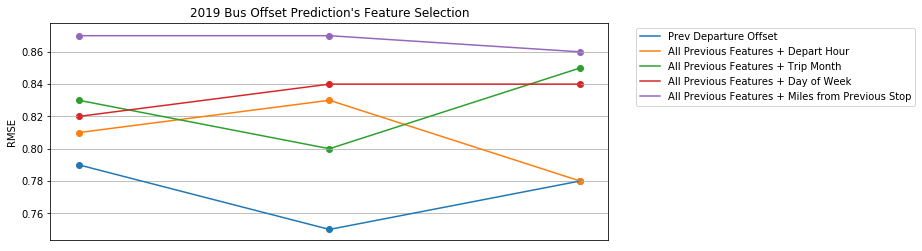

In [2]:
fig, ax = plt.subplots(figsize = (10,4))
plt.plot(kind="line")
ax.set(Title="2019 Bus Offset Prediction's Feature Selection", xlabel='Kernel Iteration', ylabel="RMSE")
feature1 = {'Kernel Iteration':[1,2,3], 'RMSE':[.79,.75,.78]}
feature2 = {'Kernel Iteration':[1,2,3], 'RMSE':[.81,.83,.78]}
feature3 = {'Kernel Iteration':[1,2,3], 'RMSE':[.83,.80,.85]}
feature4 = {'Kernel Iteration':[1,2,3], 'RMSE':[.82,.84,.84]}
feature5 = {'Kernel Iteration':[1,2,3], 'RMSE':[.87,.87,.86]}

plt.plot(feature1['Kernel Iteration'], feature1['RMSE'], label = 'Prev Departure Offset')
plt.scatter(feature1['Kernel Iteration'], feature1['RMSE'])

plt.plot(feature2['Kernel Iteration'], feature2['RMSE'], label = 'All Previous Features + Depart Hour')
plt.scatter(feature2['Kernel Iteration'], feature2['RMSE'])

plt.plot(feature3['Kernel Iteration'], feature3['RMSE'], label = 'All Previous Features + Trip Month')
plt.scatter(feature3['Kernel Iteration'], feature3['RMSE'])

plt.plot(feature4['Kernel Iteration'], feature4['RMSE'], label = 'All Previous Features + Day of Week')
plt.scatter(feature4['Kernel Iteration'], feature4['RMSE'])

plt.plot(feature5['Kernel Iteration'], feature5['RMSE'], label = 'All Previous Features + Miles from Previous Stop')
plt.scatter(feature5['Kernel Iteration'], feature5['RMSE'])

ax.axes.xaxis.set_visible(False)
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left', ncol=1)
plt.grid()

plt.show()



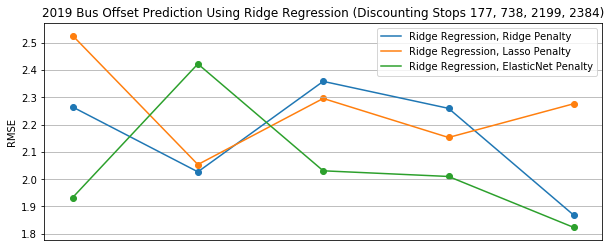

In [3]:
fig, ax = plt.subplots(figsize = (10,4))
plt.plot(kind="line")
ax.set(Title="2019 Bus Offset Prediction Using Ridge Regression (Discounting Stops 177, 738, 2199, 2384)", xlabel='Kernel Iteration', ylabel="RMSE")
feature1 = {'Kernel Iteration':[1,2,3,4,5], 'RMSE':[2.264714267,2.026910235,2.358518082,2.259610835,1.867900997]}
feature2 = {'Kernel Iteration':[1,2,3,4,5], 'RMSE':[2.526617941,2.053669682,2.295883475,2.152879449,2.276580099]}
feature3 = {'Kernel Iteration':[1,2,3,4,5], 'RMSE':[1.932393877,2.422483599,2.030715691,2.009948147,1.823060925]}


plt.plot(feature1['Kernel Iteration'], feature1['RMSE'], label = 'Ridge Regression, Ridge Penalty')
plt.scatter(feature1['Kernel Iteration'], feature1['RMSE'])

plt.plot(feature2['Kernel Iteration'], feature2['RMSE'], label = 'Ridge Regression, Lasso Penalty')
plt.scatter(feature2['Kernel Iteration'], feature2['RMSE'])

plt.plot(feature3['Kernel Iteration'], feature3['RMSE'], label = 'Ridge Regression, ElasticNet Penalty')
plt.scatter(feature3['Kernel Iteration'], feature3['RMSE'])


ax.axes.xaxis.set_visible(False)
plt.legend()
# plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left', ncol=1)
plt.grid()

plt.show()

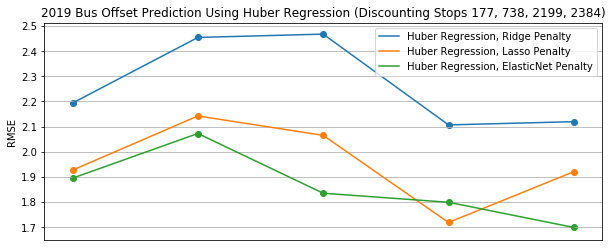

In [4]:
fig, ax = plt.subplots(figsize = (10,4))
plt.plot(kind="line")
ax.set(Title="2019 Bus Offset Prediction Using Huber Regression (Discounting Stops 177, 738, 2199, 2384)", xlabel='Kernel Iteration', ylabel="RMSE")
feature1 = {'Kernel Iteration':[1,2,3,4,5], 'RMSE':[2.193793648,2.45456413,2.467806288,2.106826587,2.119585888]}
feature2 = {'Kernel Iteration':[1,2,3,4,5], 'RMSE':[1.927003018,2.142368461,2.06524977,1.718850926,1.920833079]}
feature3 = {'Kernel Iteration':[1,2,3,4,5], 'RMSE':[1.895005831,2.072614232,1.835134822,1.799137096,1.698982884]}


plt.plot(feature1['Kernel Iteration'], feature1['RMSE'], label = 'Huber Regression, Ridge Penalty')
plt.scatter(feature1['Kernel Iteration'], feature1['RMSE'])

plt.plot(feature2['Kernel Iteration'], feature2['RMSE'], label = 'Huber Regression, Lasso Penalty')
plt.scatter(feature2['Kernel Iteration'], feature2['RMSE'])

plt.plot(feature3['Kernel Iteration'], feature3['RMSE'], label = 'Huber Regression, ElasticNet Penalty')
plt.scatter(feature3['Kernel Iteration'], feature3['RMSE'])

ax.axes.xaxis.set_visible(False)
plt.legend(loc='upper right')
# plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left', ncol=1)
plt.grid()

plt.show()

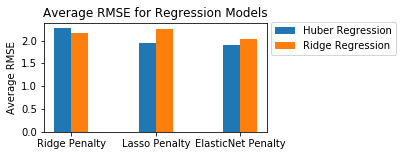

In [16]:
import numpy as np
fig, ax = plt.subplots(figsize = (4,2))

w = 0.2
x = ['Ridge Penalty', 'Lasso Penalty', 'ElasticNet Penalty']
huber = [2.268515308,1.954861051, 1.900472995]
ridge = [2.155530883, 2.261126129, 2.043720448]
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1, huber, w ,label = 'Huber Regression')
plt.bar(bar2, ridge, w, label = 'Ridge Regression')

plt.ylabel('Average RMSE')
plt.title('Average RMSE for Regression Models')


plt.xticks(bar1+w/2, x)
plt.legend(bbox_to_anchor=(1.6, 1.06), loc='upper right', ncol=1)

plt.show()